In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

**Extracting the data from the csv files:**

In [ ]:
Y=pd.read_csv("Monthy_GDP_MI.csv")
X=pd.read_csv("monthly_main_category.csv")
Y=Y.drop(['Unnamed: 0'],axis=1)
X=X.drop(['Unnamed: 0'],axis=1)

**Pre-processing:** Match the values according to the date

In [ ]:
df_X = X.rename(columns={'date': 'time'})
merged_df = pd.merge(Y, df_X, on='time')
X = merged_df.drop(['value', 'time'], axis=1)
y = merged_df['value']

Understanding the data


Missing values in each column:
time                       0
value                      0
Arts & Entertainment       0
Autos & Vehicles           0
Beauty & Fitness           0
Books & Literature         0
Business & Industrial      0
Computers & Electronics    0
Finance                    0
Food & Drink               0
Games                      0
Health                     0
Hobbies & Leisure          0
Home & Garden              0
Internet & Telecom         0
Jobs & Education           0
Law & Government           0
News                       0
Online Communities         0
People & Society           0
Pets & Animals             0
Real Estate                0
Reference                  0
Science                    0
Shopping                   0
Sports                     0
Travel                     0
dtype: int64


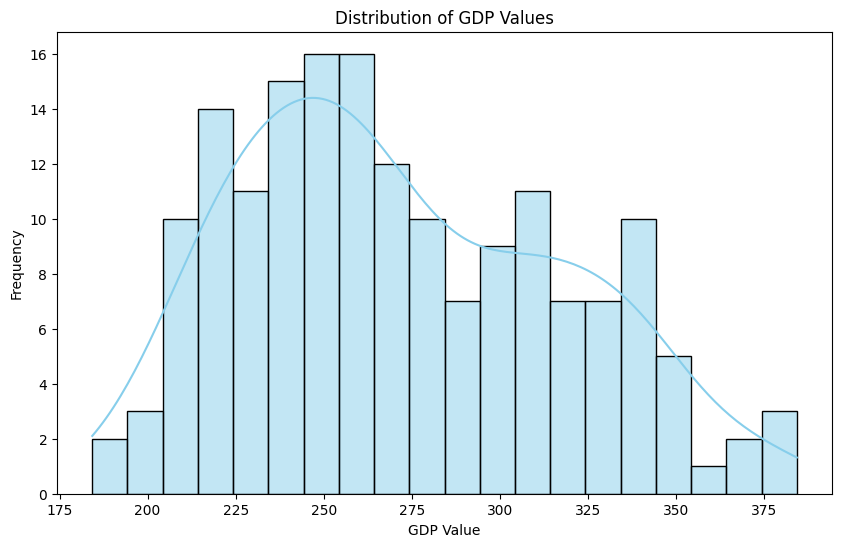

In [ ]:
# Drop non-numeric columns from the merged dataframe for EDA
numeric_df = merged_df.select_dtypes(include=[float, int])

# Check for missing values
print("\nMissing values in each column:")
print(merged_df.isnull().sum())


# Distribution of GDP values
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['value'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of GDP Values')
plt.xlabel('GDP Value')
plt.ylabel('Frequency')
plt.show()



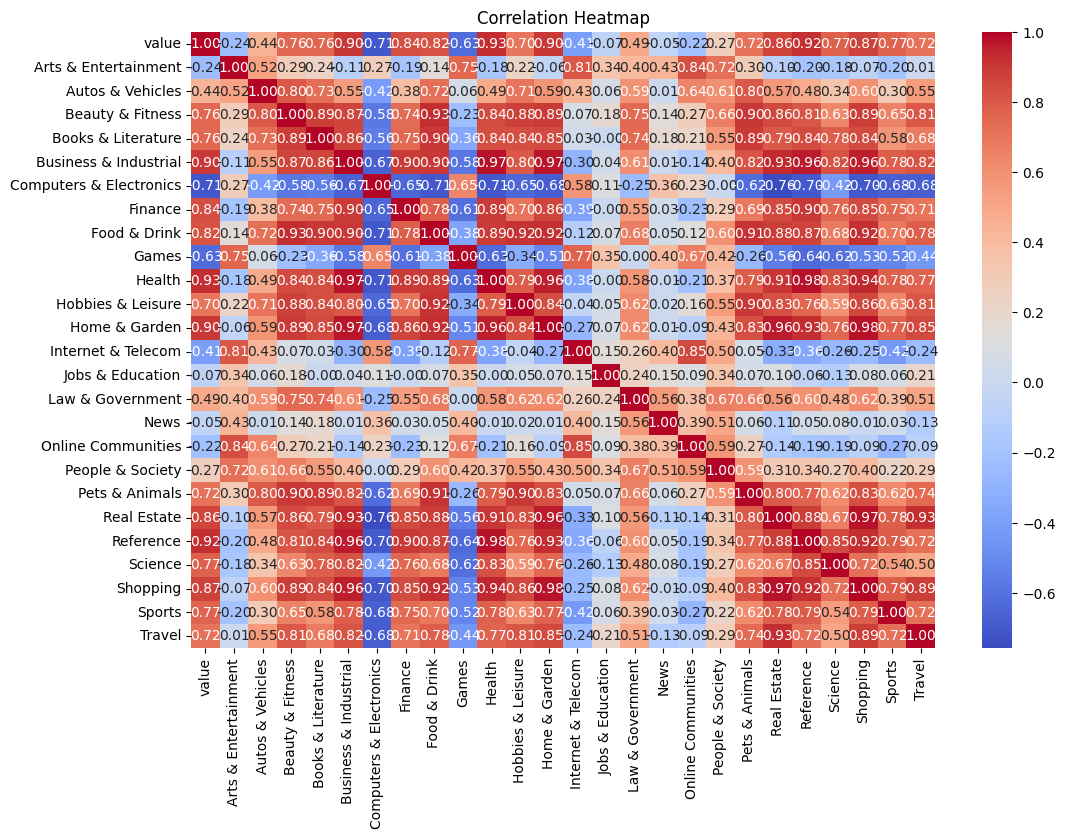

In [ ]:
# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()


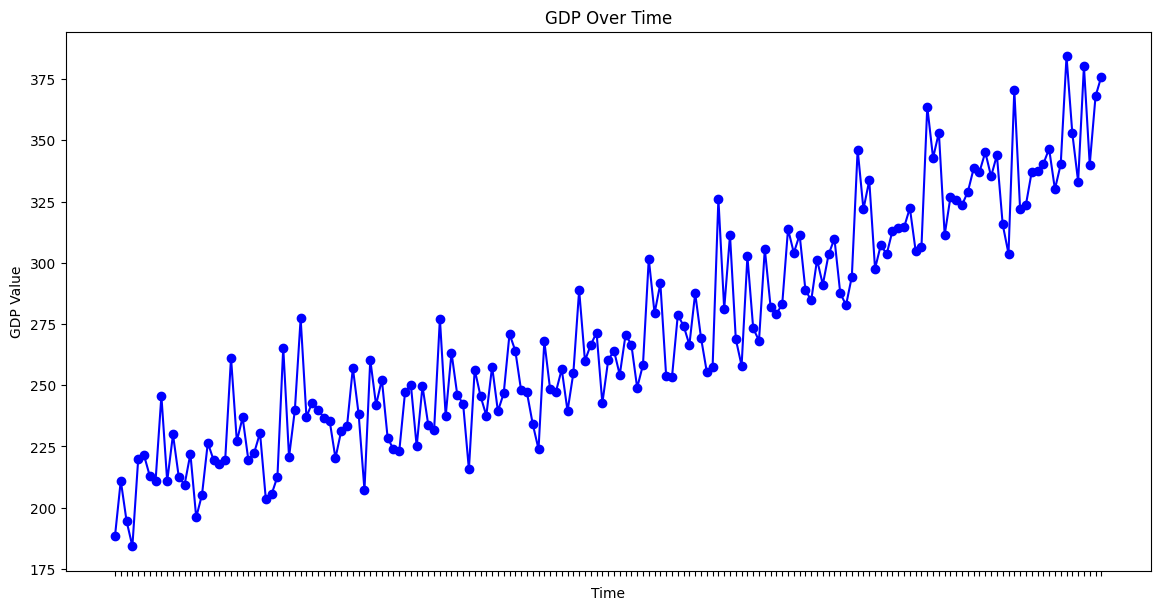

In [ ]:
# Line plot of GDP values over time
plt.figure(figsize=(14, 7))
plt.plot(merged_df['time'], merged_df['value'], color='blue', marker='o')
plt.title('GDP Over Time')
plt.xlabel('Time')
plt.ylabel('GDP Value')
plt.xticks(rotation=45)
plt.gca().set_xticklabels([])
plt.show()

<ipython-input-7-9843ba321367>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.index[1:10], y=target_corr.values[1:10], palette='viridis', ax=axs[0])
<ipython-input-7-9843ba321367>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.index[-10:], y=target_corr.values[-10:], palette='magma', ax=axs[1])


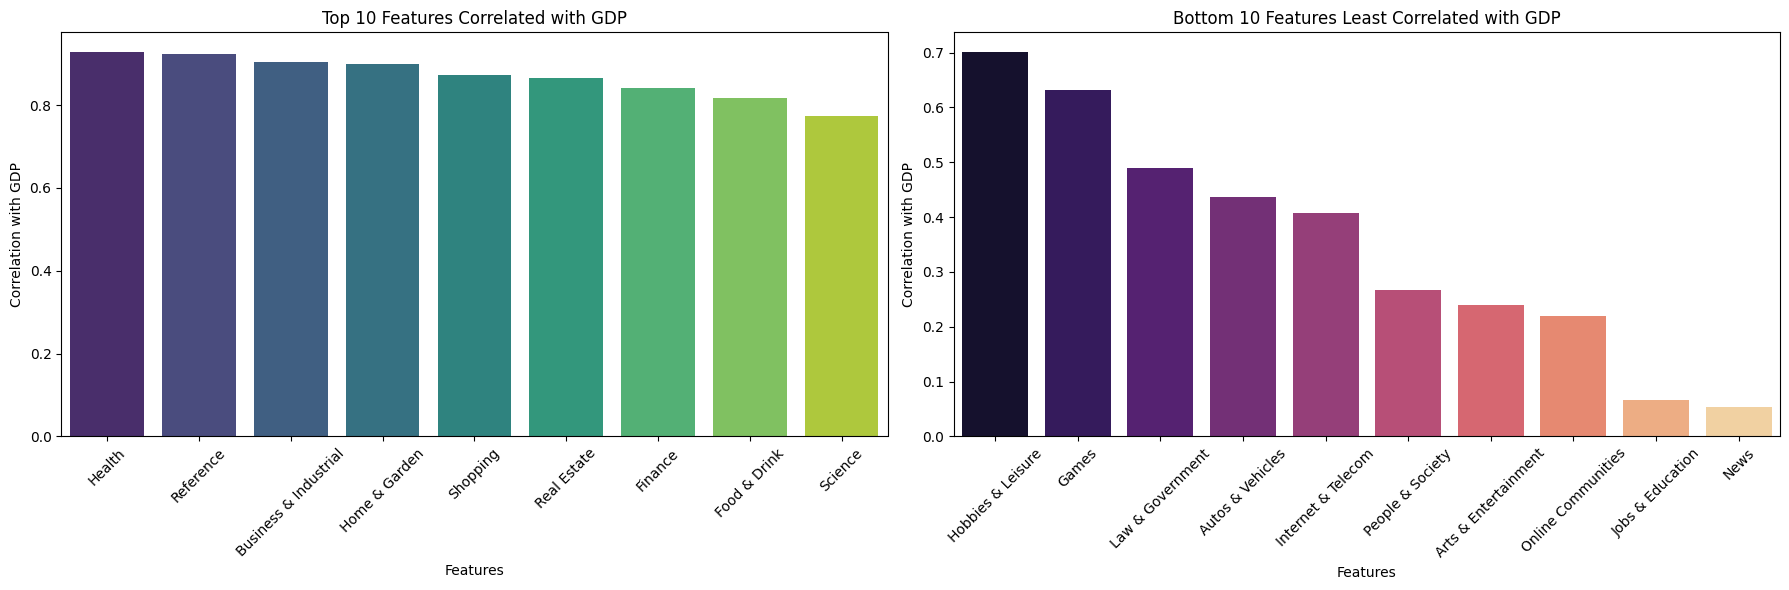

In [ ]:
correlation_matrix = numeric_df.corr()
target_corr = correlation_matrix['value'].abs().sort_values(ascending=False)
high_corr_features = target_corr[target_corr > 0.5].index.tolist()  # Selecting features with correlation > 0.5

fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# First subplot: Top 10 features correlated with GDP
sns.barplot(x=target_corr.index[1:10], y=target_corr.values[1:10], palette='viridis', ax=axs[0])
axs[0].set_title('Top 10 Features Correlated with GDP')
axs[0].set_xlabel('Features')
axs[0].set_ylabel('Correlation with GDP')
axs[0].tick_params(axis='x', rotation=45)

# Second subplot: Bottom 10 features least correlated with GDP
sns.barplot(x=target_corr.index[-10:], y=target_corr.values[-10:], palette='magma', ax=axs[1])
axs[1].set_title('Bottom 10 Features Least Correlated with GDP')
axs[1].set_xlabel('Features')
axs[1].set_ylabel('Correlation with GDP')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

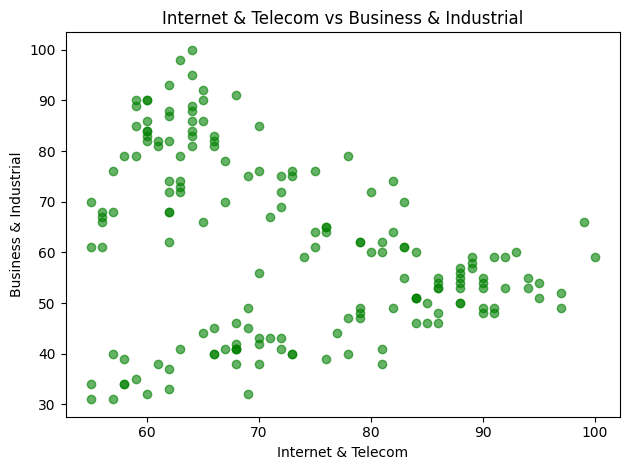

In [ ]:
plt.scatter(X['Internet & Telecom'], X['Business & Industrial'], color='green', alpha=0.6)
plt.title('Internet & Telecom vs Business & Industrial')
plt.xlabel('Internet & Telecom')
plt.ylabel('Business & Industrial')

plt.tight_layout()
plt.show()

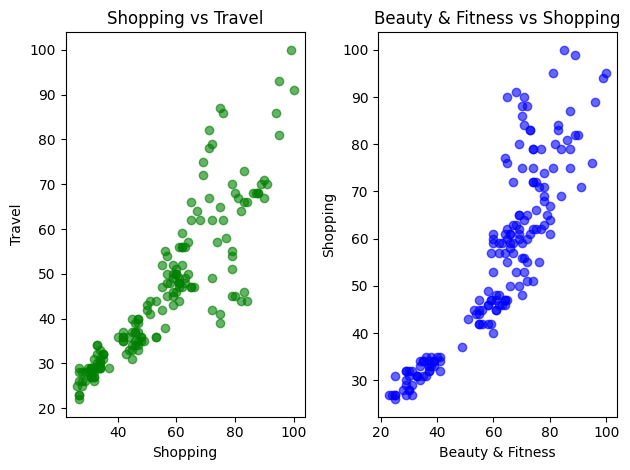

In [ ]:
plt.subplot(1, 2, 1)
plt.scatter(X['Shopping'], X['Travel'], color='green', alpha=0.6)
plt.title('Shopping vs Travel')
plt.xlabel('Shopping')
plt.ylabel('Travel')


plt.subplot(1, 2, 2)
plt.scatter(X['Beauty & Fitness'], X['Shopping'], color='blue', alpha=0.6)
plt.title('Beauty & Fitness vs Shopping')
plt.xlabel('Beauty & Fitness')
plt.ylabel('Shopping')

plt.tight_layout()
plt.show()

**First model**: Random forest


In [ ]:
#Splitting the dataset for training and testing
#Use of random forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)


model = RandomForestRegressor(n_estimators=282, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=282, random_state=42)

In [ ]:
#Evaluating the model
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)
mse=mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

nowcast = model.predict(X_test[-1:])
print('Nowcast GDP:', nowcast)

Mean Absolute Error: 12.265428600855863
Mean Squared Error: 214.921628873041
Nowcast GDP: [335.57911387]


**Second model:** Linear regression

Let's try to use linear regression and observe the result.
We apply the same steps

In [ ]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

y_pred1 = model1.predict(X_test)

mae1 = mean_absolute_error(y_test, y_pred1)
print('Mean Absolute Error:', mae1)
mse1=mean_squared_error(y_test, y_pred1)
print('Mean Squared Error:', mse1)


nowcast1 = model1.predict(X_test[-1:])
print('Nowcast GDP:', nowcast1)

Mean Absolute Error: 12.814364926375108
Mean Squared Error: 305.0741392514909
Nowcast GDP: [285.76574533]


**Third model :** Lasso Regression

In [ ]:
# Initialize and fit the Lasso Regression model
lasso_model = Lasso(alpha=0.007)
lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
print('Lasso Regression Mean Absolute Error:', mae_lasso)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print('Lasso Regression Mean Squared Error:', mse_lasso)

# Nowcasting
nowcast_lasso = lasso_model.predict(X_test[-1:])
print('Lasso Regression Nowcast GDP:', nowcast_lasso)


Lasso Regression Mean Absolute Error: 12.77792174381073
Lasso Regression Mean Squared Error: 305.6113066602599
Lasso Regression Nowcast GDP: [286.06750154]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.281e+04, tolerance: 2.965e+01
  model = cd_fast.enet_coordinate_descent(


**Refining these techniques**

**1-Feature selection** : applying random forest while keeping the best features

 Visualizing the most important features for the random forest


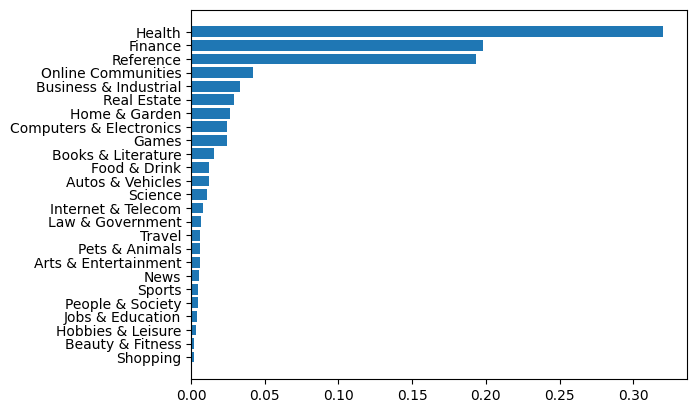

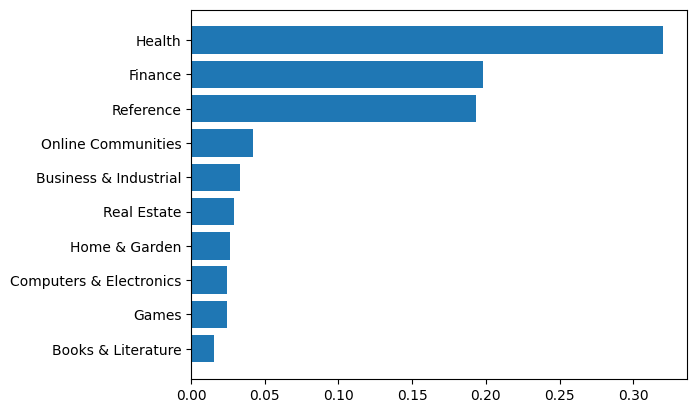

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.barh(X.columns[indices],importances[indices])
plt.show()
plt.barh(X.columns[indices[-10:]],importances[indices[-10:]])
plt.show()


In [ ]:
# Select top 10 features
top_10_indices = indices[:15]
top_10_features = X.columns[top_10_indices]

# Reduce the dataset to the top 15 features
X_top_15 = X[top_10_features]
# Split the dataset based on top 15 features
X_train15, X_test15, y_train15, y_test15 = train_test_split(X_top_15, y, test_size=0.2, shuffle=True)


In [ ]:
model15 = RandomForestRegressor(n_estimators=282, random_state=42)
model15.fit(X_train15, y_train15)

# Make predictions and evaluate the model
y_pred15 = model15.predict(X_test15)

mae15 = mean_absolute_error(y_test15, y_pred15)
print('Mean Absolute Error:', mae15)
mse15 = mean_squared_error(y_test15, y_pred15)
print('Mean Squared Error:', mse15)

Mean Absolute Error: 11.102298661606726
Mean Squared Error: 196.686175072308


**Feature selection** : applying linear regression while keeping the best features

Visualization of the best features:

In [ ]:
numeric_df = merged_df.select_dtypes(include=[float, int])
correlation_matrix = numeric_df.corr()
target_corr = correlation_matrix['value'].abs().sort_values(ascending=False)
correlation_threshold = 0.5
high_corr_features = target_corr[target_corr > correlation_threshold].index.tolist()

X_selected = merged_df[high_corr_features].drop('value', axis=1)


Linear Regression after the filtering:

In [ ]:
Y_selected = merged_df['value']

X_train2, X_test2, y_train2, y_test2 = train_test_split(
X_selected, Y_selected, test_size=0.2, shuffle=True)

model2 = LinearRegression()
model2.fit(X_train2, y_train2)

y_pred2 = model2.predict(X_test2)

mae2 = mean_absolute_error(y_test2, y_pred2)
print('Mean Absolute Error:', mae2)
mse2=mean_squared_error(y_test2, y_pred2)
print('Mean Squared Error:', mse2)

nowcast2 = model2.predict(X_test2[-1:])
print('Nowcast GDP:',nowcast2)


Mean Absolute Error: 12.864786659607322
Mean Squared Error: 339.974638137047
Nowcast GDP: [360.46391218]


**2-Hyperparameter tuning**

In [ ]:
param_grid = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]}
lasso = Lasso()

grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_alpha = grid_search.best_params_['alpha']
print(f'Best alpha value: {best_alpha}')

best_lasso_model = grid_search.best_estimator_
y_pred_best_lasso = best_lasso_model.predict(X_test)

# Evaluate the model
mae_best_lasso = mean_absolute_error(y_test, y_pred_best_lasso)
mse_best_lasso = mean_squared_error(y_test, y_pred_best_lasso)

print('Best Lasso Regression Mean Absolute Error:', mae_best_lasso)
print('Best Lasso Regression Mean Squared Error:', mse_best_lasso)
print('Best Lasso Regression Nowcast GDP:', best_lasso_model.predict(X_test[-1:]))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.098e+04, tolerance: 2.407e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.995e+03, tolerance: 2.210e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.722e+03, tolerance: 2.274e

Best alpha value: 10
Best Lasso Regression Mean Absolute Error: 11.944465863176758
Best Lasso Regression Mean Squared Error: 236.7295738849314
Best Lasso Regression Nowcast GDP: [289.75511784]


**RESULTS**

In [ ]:
# Plotting the results
plt.figure(figsize=(14, 8))

# Actual values
plt.plot(y_test.values, label='Actual GDP', color='black', linewidth=2)

# Random Forest predictions
plt.plot(y_pred, label='Random Forest Predictions', linestyle='--', color='blue')

# Linear Regression predictions
plt.plot(y_pred1, label='Linear Regression Predictions', linestyle='--', color='green')

# Lasso Regression predictions
plt.plot(y_pred_lasso, label='Lasso Regression Predictions', linestyle='--', color='red')

# Labels and title
plt.xlabel('Time (Index)')
plt.ylabel('GDP Value')
plt.title('Actual vs Predicted GDP Values')
plt.legend()

# Display the plot
plt.show()
